<a href="https://colab.research.google.com/github/SamanthaHassal/time-FTS/blob/main/opitcal_efficiency_EDA_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import from __future__
from __future__ import division, print_function
#import everything else
import numpy as np
import matplotlib.pyplot as plt
import timefpu.calib.time201812 as calib
import timefpu.coordinates as coords
import timefpu.params as params
import timefpu.mce_data as mce_data

Calib Test Results (should be ~1): 1.08 1.03
Calib Values: 2.9287502999040305e-07 1.113420427553444e-09


In [ ]:
my_file = mce_data.MCEFile('/home/jovyan/Astro research/optical efficiency/iv_opteff_300K_run1')
bias = np.loadtxt("/home/jovyan/Astro research/optical efficiency/iv_opteff_300K_run1.bias", skiprows=1)
tes = -1.0*my_file.Read(row_col=True, unfilter='DC', unwrap=True).data

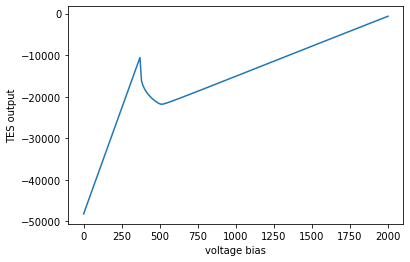

0


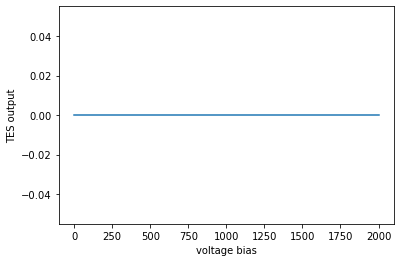

1


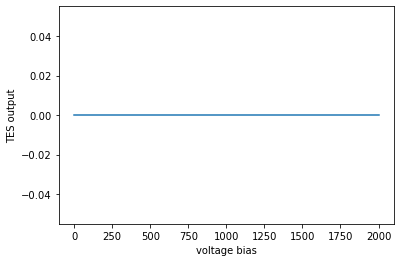

2


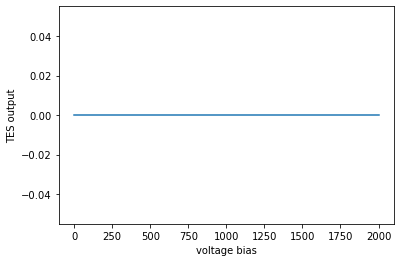

3


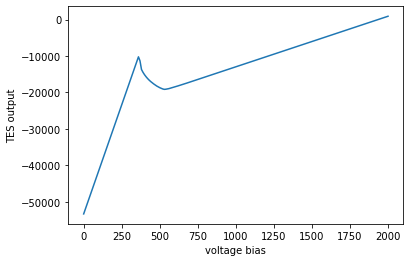

4


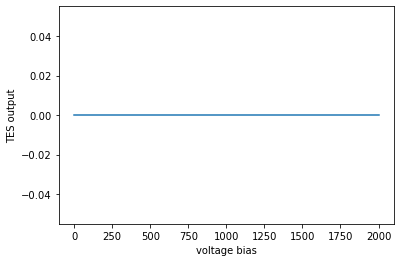

5


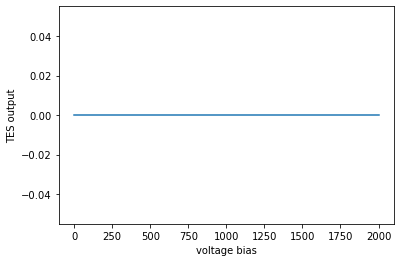

6


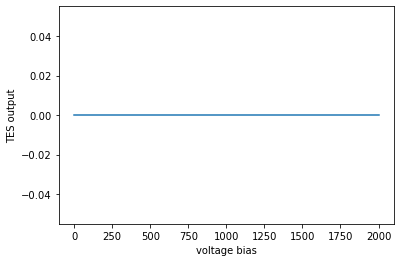

7


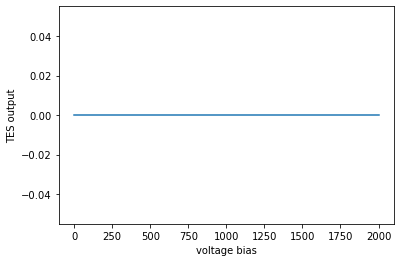

8


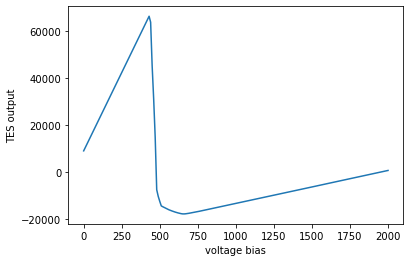

9


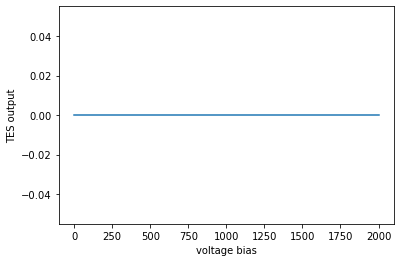

10


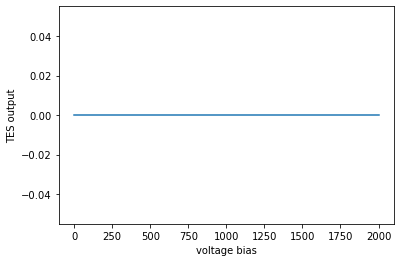

11


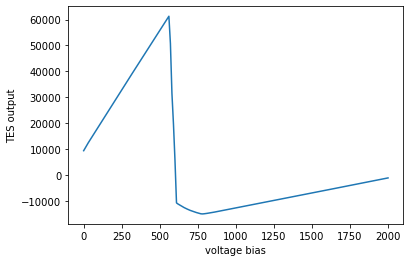

12


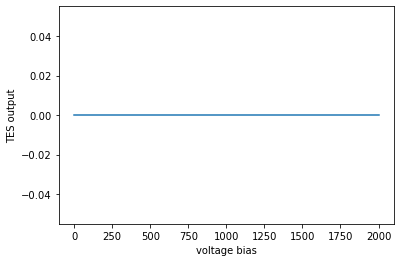

13


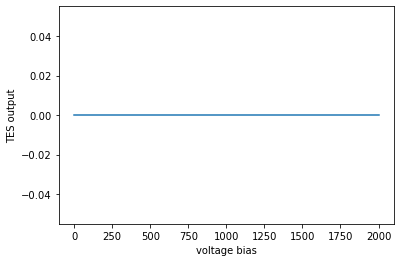

14


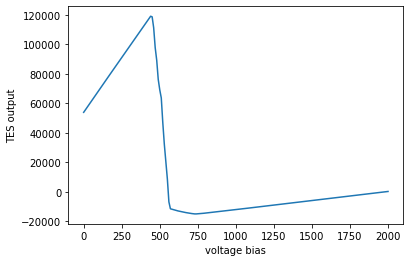

15


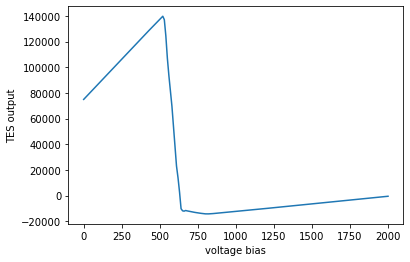

16


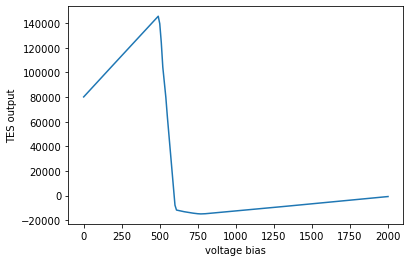

17


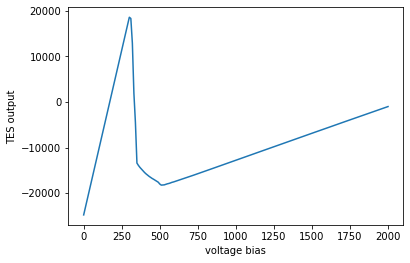

18


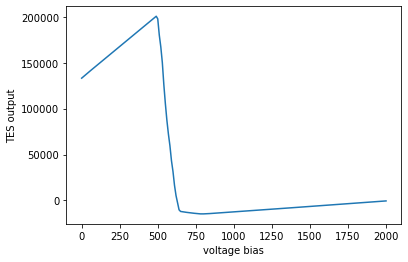

19


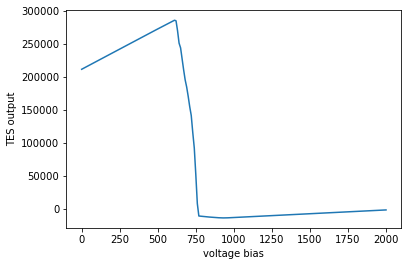

20


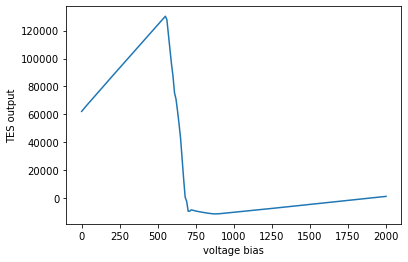

21


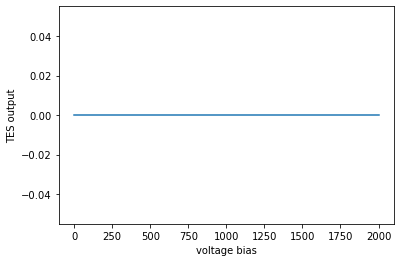

22


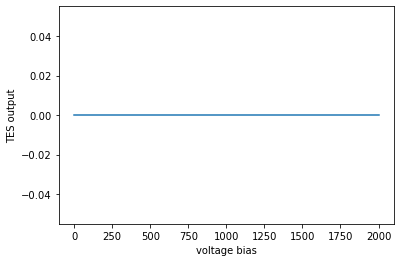

23


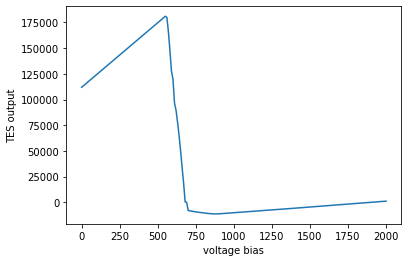

24


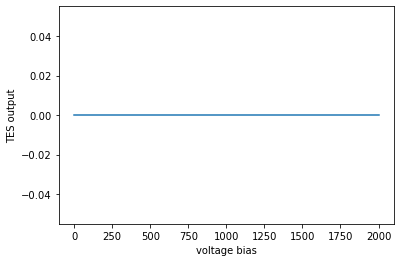

25


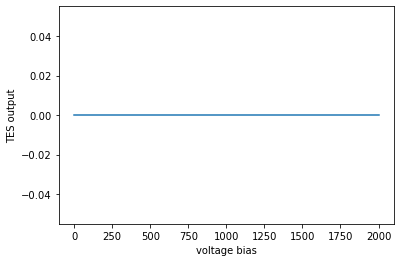

26


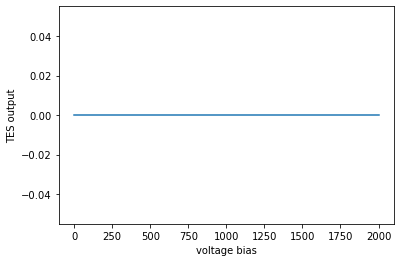

27


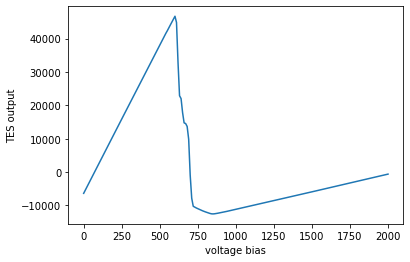

28


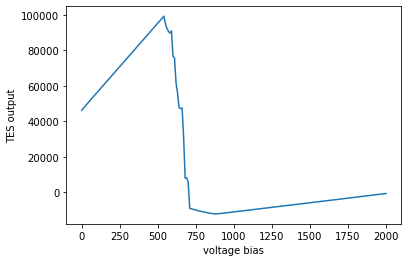

29


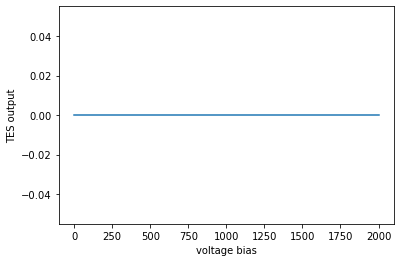

30


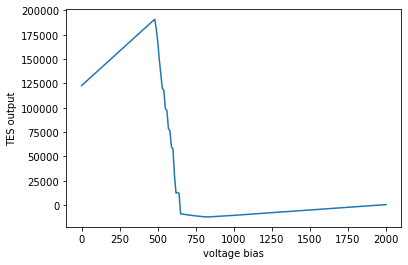

31


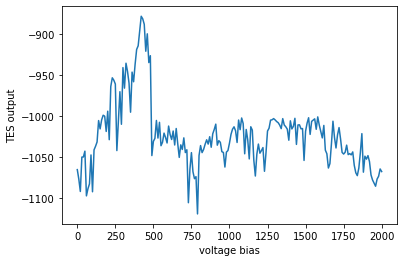

32


In [ ]:
#search for anomalies in the data
for i in range(tes.shape[0]):
    plt.plot(bias, tes[i, 0, :])
    plt.xlabel("voltage bias")
    plt.ylabel("TES output")
    plt.show()
    print(i)


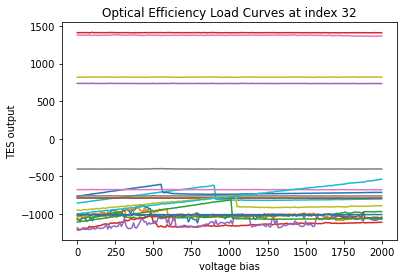

In [ ]:
#check if special case or intrinsic
anomaly_index = 32
for i in range(tes.shape[1]):
    if np.count_nonzero(tes[anomaly_index, i, :])!=0:
        plt.plot(bias, tes[anomaly_index, i, :])
        plt.xlabel("voltage bias")
        plt.ylabel("TES output")
plt.title("Optical Efficiency Load Curves at index 32")
plt.show()

In [ ]:
my_file_2 = mce_data.MCEFile('/home/jovyan/Astro research/partial cabin/iv_partial_cabin_15.01C_r3')
bias2 = np.loadtxt("/home/jovyan/Astro research/partial cabin/iv_partial_cabin_15.01C_r3.bias", skiprows=1)
tes2 = -1.0*my_file_2.Read(row_col=True, unfilter='DC', unwrap=True).data

0


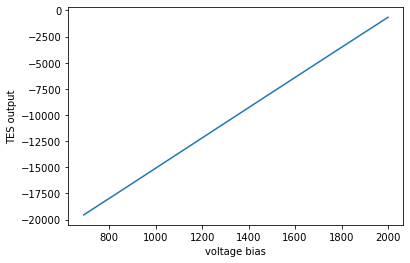

1


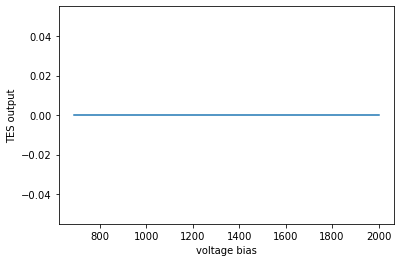

2


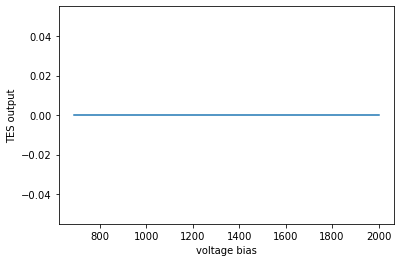

3


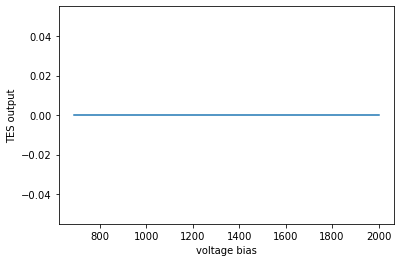

4


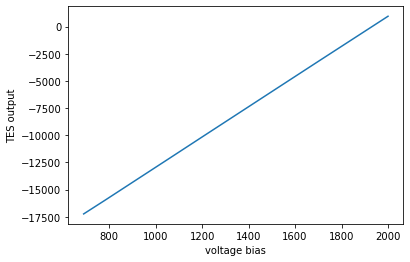

5


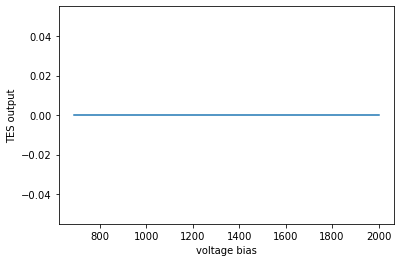

6


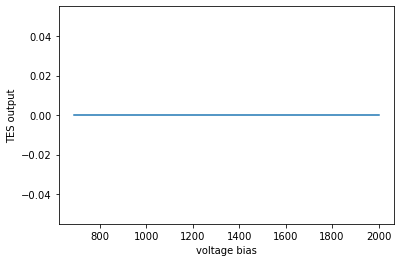

7


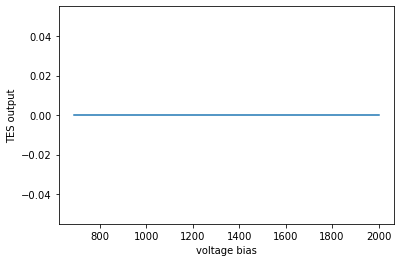

8


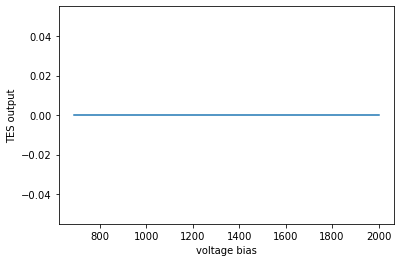

9


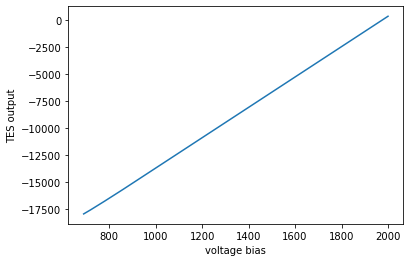

10


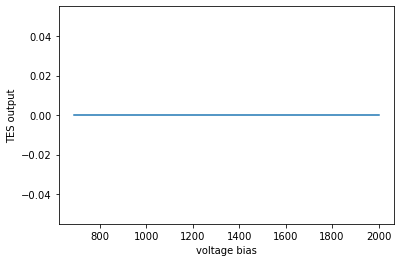

11


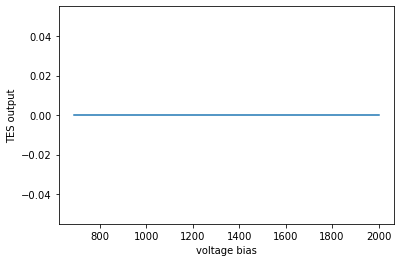

12


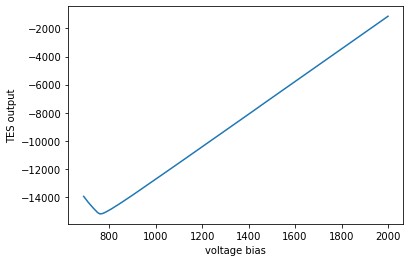

13


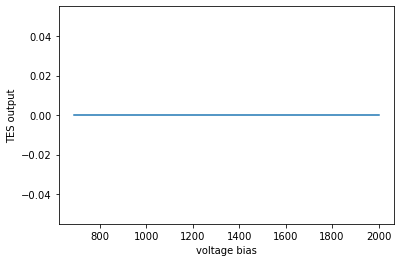

14


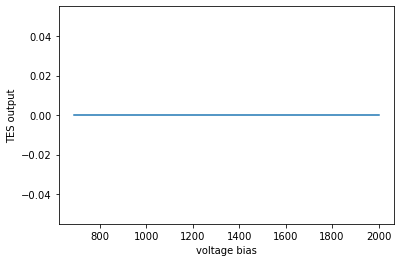

15


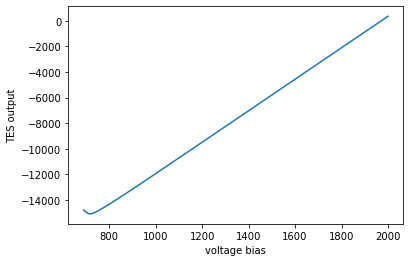

16


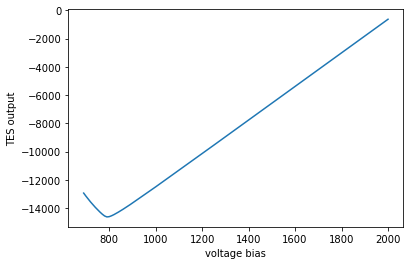

17


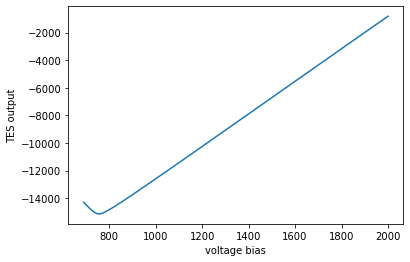

18


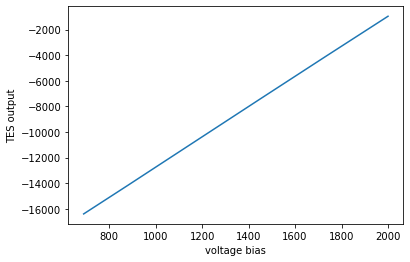

19


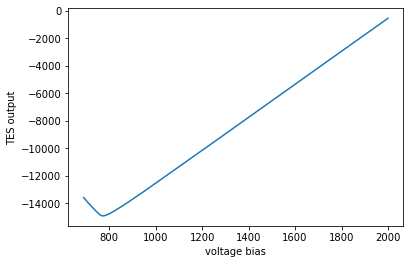

20


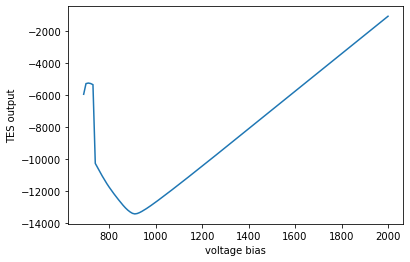

21


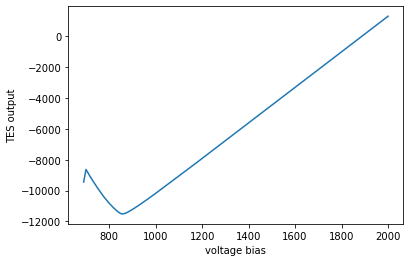

22


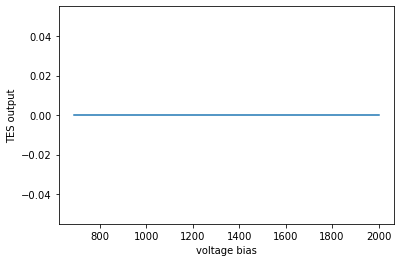

23


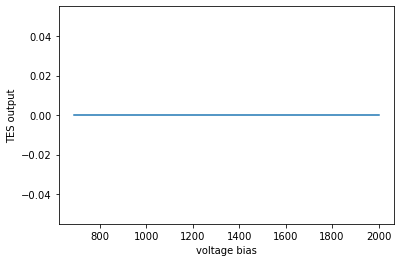

24


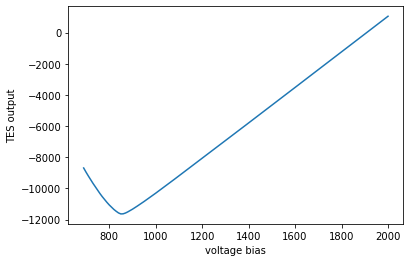

25


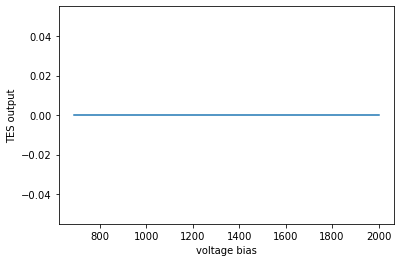

26


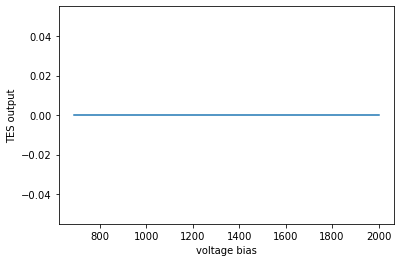

27


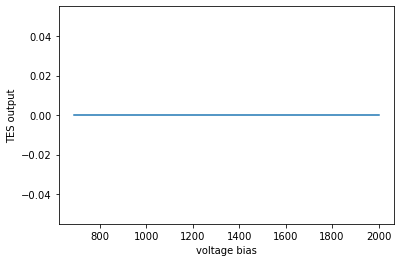

28


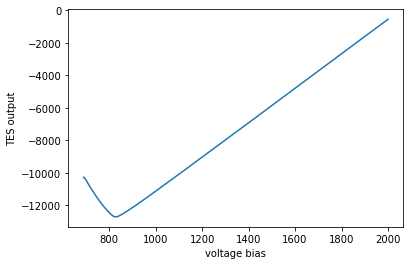

29


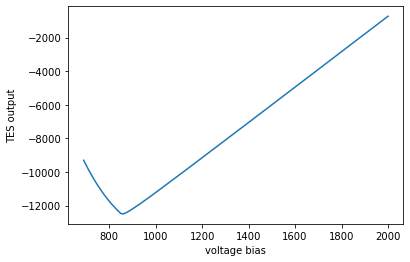

30


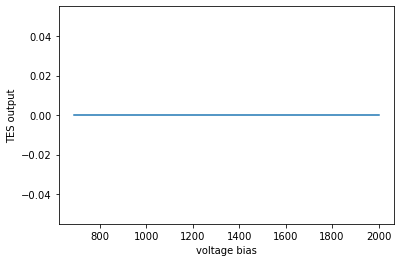

31


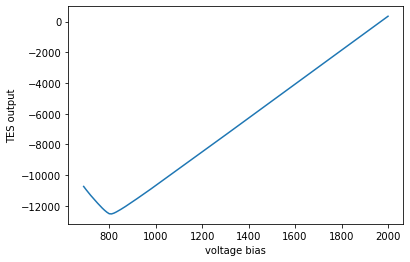

32


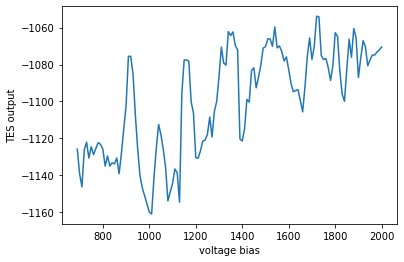

In [ ]:
#search for anomalies in the data
for i in range(tes2.shape[0]):
    print(i)
    plt.plot(bias2, tes2[i, 0, :])
    plt.xlabel("voltage bias")
    plt.ylabel("TES output")
    plt.show()

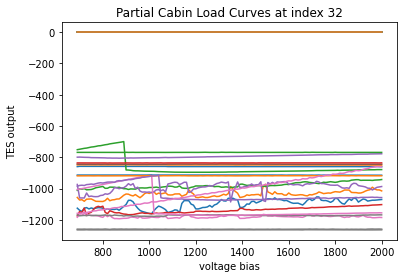

In [ ]:
#check if special case or intrinsic
anomaly_index = 32
for i in range(tes2.shape[1]):
    plt.plot(bias2, tes2[anomaly_index, i, :])
    plt.xlabel("voltage bias")
    plt.ylabel("TES output")
plt.title("Partial Cabin Load Curves at index 32")
plt.show()

In [ ]:
#list of MSBD coordinates (assuming indices from file are multiplexing rows and columns)
coords_list = [coords.muxcr_to_msbd(anomaly_index, i, p=0) for i in range(tes.shape[1])]
#frequency and spatial index from MSBD 
xf_list = [coords.msbd_to_xf(c[0], c[1], c[2], c[3]) for c in coords_list]
#coordinates of frequency index anomaly
anomXF = (9, 24)
anomXF in xf_list

False

In [ ]:
#list of MSBD coordinates (assuming indices from file are multiplexing rows and columns)
coords_list2 = [coords.muxcr_to_msbd(anomaly_index, i, p=0) for i in range(tes2.shape[1])]
#frequency and spatial index from MSBD 
xf_list2 = [coords.msbd_to_xf(c[0], c[1], c[2], c[3]) for c in coords_list]
#coordinates of frequency index anomaly
anomXF = (9, 24)
anomXF in xf_list2

False

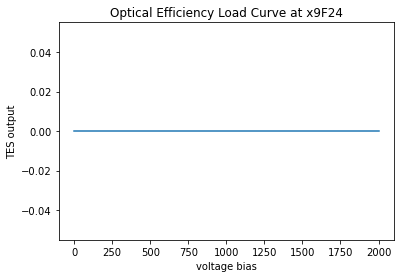

In [ ]:
#recreate plot
mux_c, mux_r = coords.xf_to_muxcr(anomXF[0], anomXF[1])
tesAtX9F24 = tes[mux_c, mux_r, :]
plt.plot(bias, tesAtX9F24)
plt.xlabel("voltage bias")
plt.ylabel("TES output")
plt.title("Optical Efficiency Load Curve at x9F24")
plt.show()

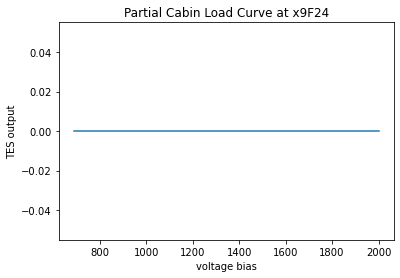

In [ ]:
#recreate plot
mux_c, mux_r = coords.xf_to_muxcr(anomXF[0], anomXF[1])
tesAtX9F24_2 = tes2[mux_c, mux_r, :]
plt.plot(bias2, tesAtX9F24_2)
plt.xlabel("voltage bias")
plt.ylabel("TES output")
plt.title("Partial Cabin Load Curve at x9F24")
plt.show()

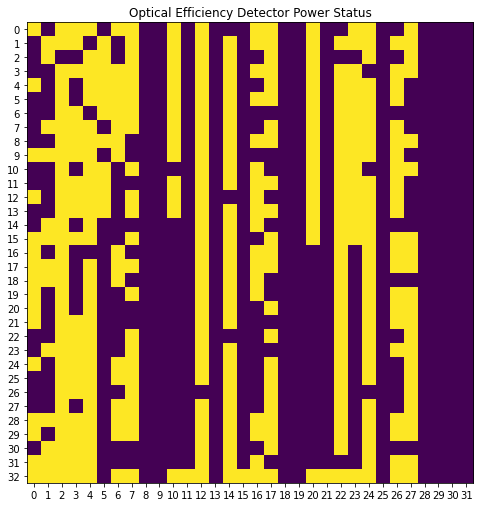

In [ ]:
#determine which detectors were on or off
#build dictionary of dictionaries that tell us which detectors were on or off
coord_dict = {}
for j in range(tes.shape[0]):
    coord_dict[j] = {coords.muxcr_to_msbd(j, i, p=0):np.count_nonzero(tes[j, i, :])!=0 for i in range(tes.shape[1])}
#collect these into a numpy array 
on_off = np.array([[int(x == True) for x in np.array(list(coord_dict[k].values()))] for k in coord_dict])
#plot graph
fig, ax = plt.subplots(figsize=(8, 10))
im = ax.imshow(on_off)
ax.set_xticks(np.arange(tes.shape[1]))
ax.set_yticks(np.arange(tes.shape[0]))
plt.title("Optical Efficiency Detector Power Status")
plt.show()

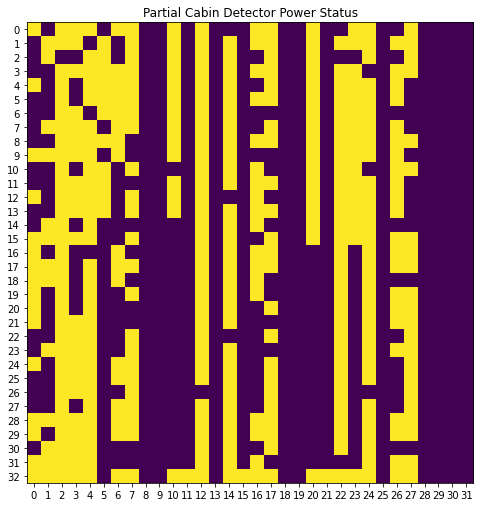

In [ ]:
#determine which detectors were on or off
#build dictionary of dictionaries that tell us which detectors were on or off
coord_dict2 = {}
for j in range(tes2.shape[0]):
    coord_dict2[j] = {coords.muxcr_to_msbd(j, i, p=0):np.count_nonzero(tes2[j, i, :])!=0 for i in range(tes2.shape[1])}
#collect these into a numpy array 
on_off2 = np.array([[int(x == True) for x in np.array(list(coord_dict2[k].values()))] for k in coord_dict2])
#plot graph
fig, ax = plt.subplots(figsize=(8, 10))
im = ax.imshow(on_off)
ax.set_xticks(np.arange(tes2.shape[1]))
ax.set_yticks(np.arange(tes2.shape[0]))
plt.title("Partial Cabin Detector Power Status")
plt.show()

In [ ]:
my_file3 = mce_data.MCEFile('/home/jovyan/Astro research/77 K/iv_opteff_77K_run1')
bias3 = np.loadtxt("/home/jovyan/Astro research/77 K/iv_opteff_77K_run1.bias", skiprows=1)
tes3 = -1.0*my_file3.Read(row_col=True, unfilter='DC', unwrap=True).data

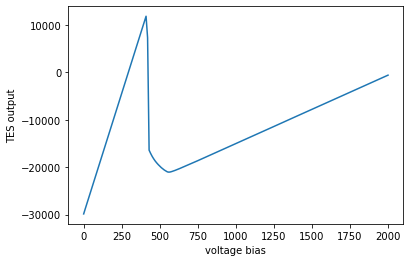

0


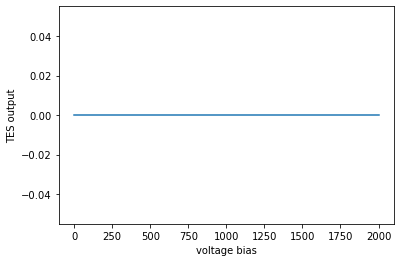

1


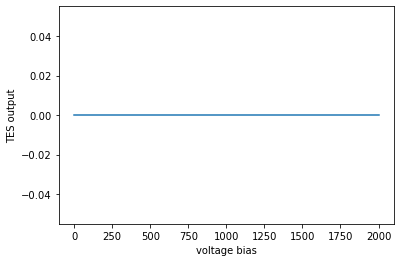

2


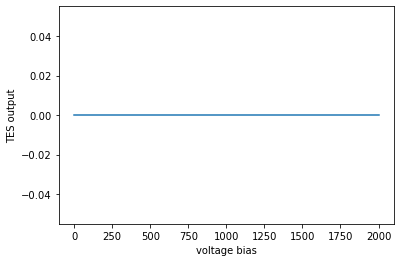

3


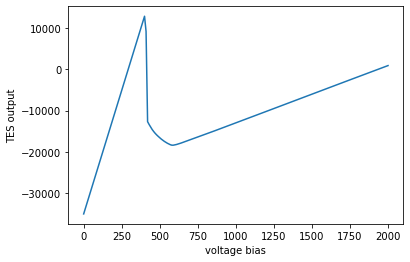

4


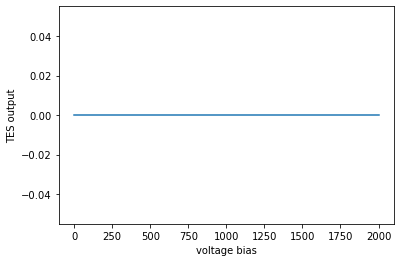

5


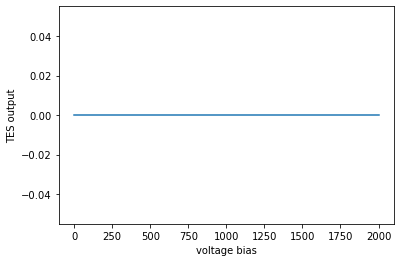

6


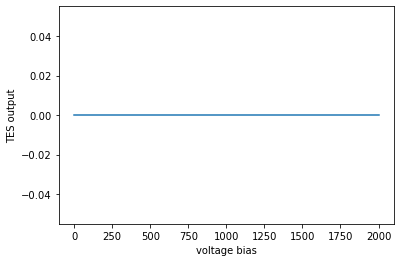

7


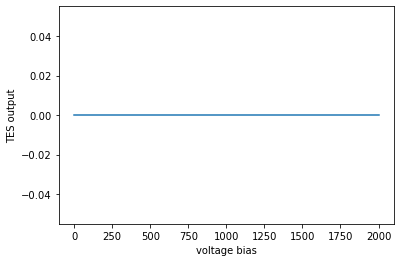

8


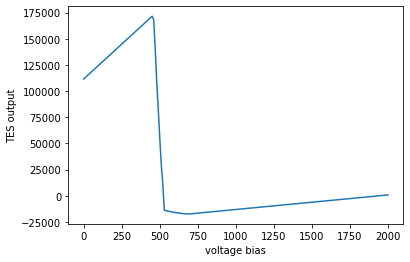

9


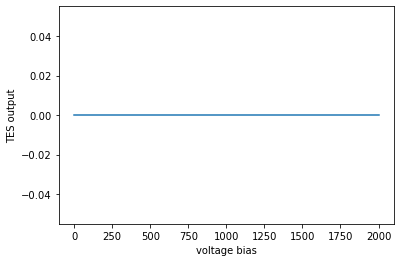

10


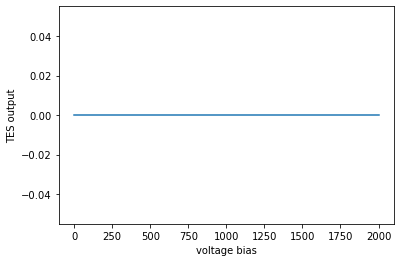

11


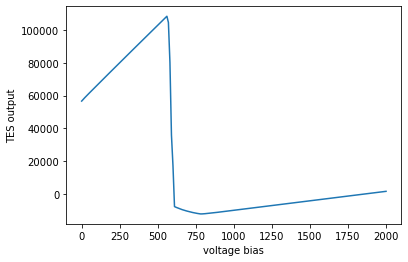

12


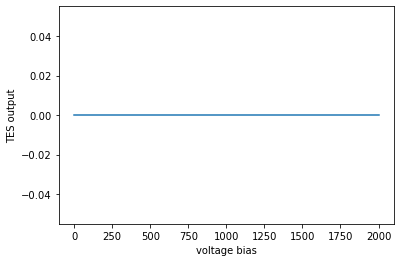

13


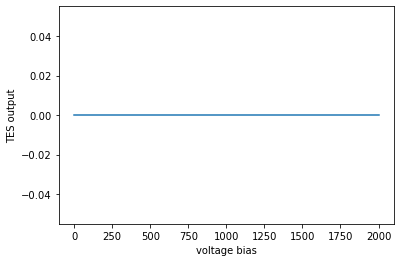

14


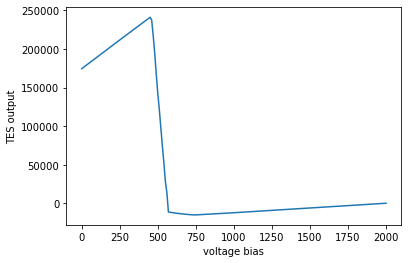

15


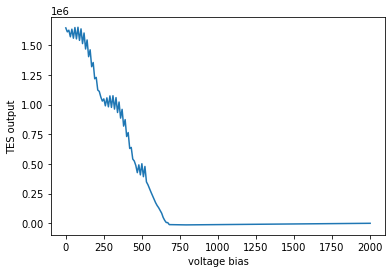

16


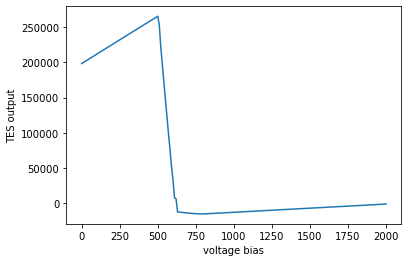

17


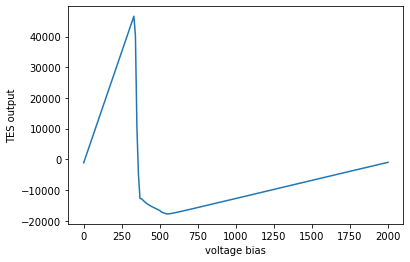

18


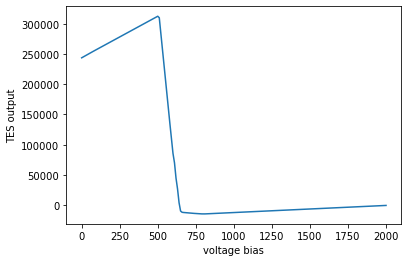

19


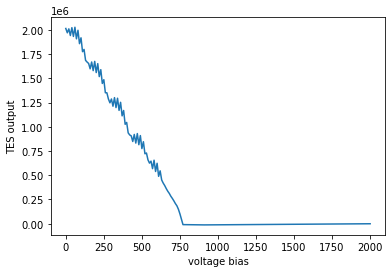

20


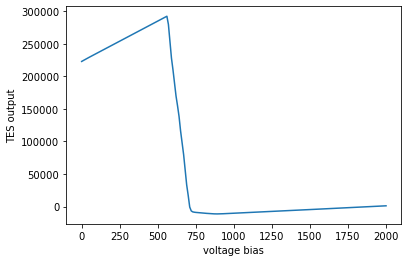

21


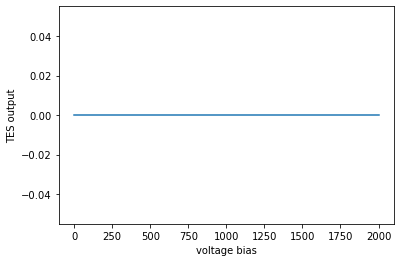

22


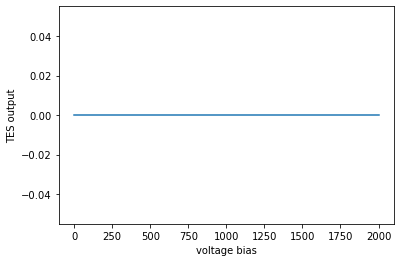

23


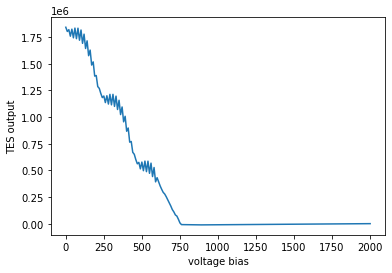

24


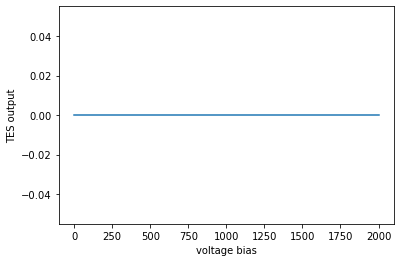

25


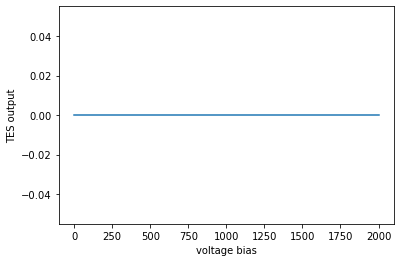

26


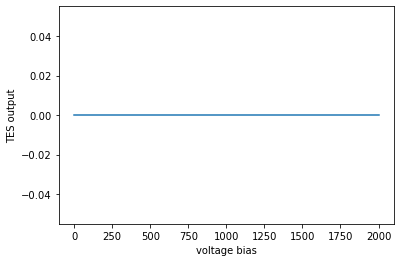

27


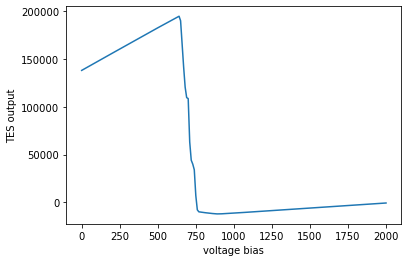

28


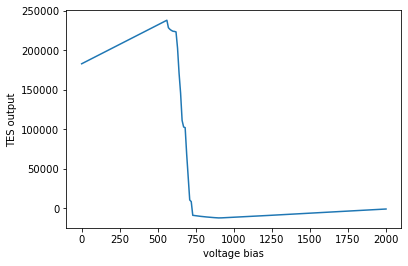

29


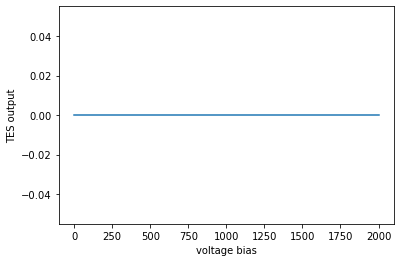

30


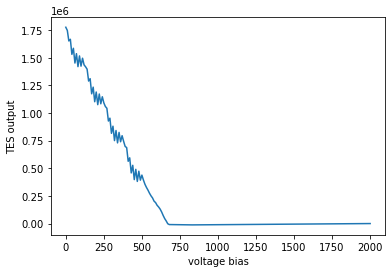

31


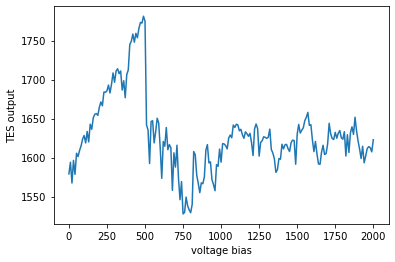

32


In [ ]:
#search for anomalies in the data
for i in range(tes3.shape[0]):
    plt.plot(bias3, tes3[i, 0, :])
    plt.xlabel("voltage bias")
    plt.ylabel("TES output")
    plt.show()
    print(i)


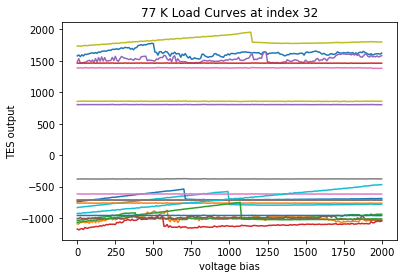

In [ ]:
for i in range(tes3.shape[1]):
    if np.count_nonzero(tes3[anomaly_index, i, :])!=0:
        plt.plot(bias3, tes3[anomaly_index, i, :])
        plt.xlabel("voltage bias")
        plt.ylabel("TES output")
plt.title("77 K Load Curves at index 32")
plt.show()

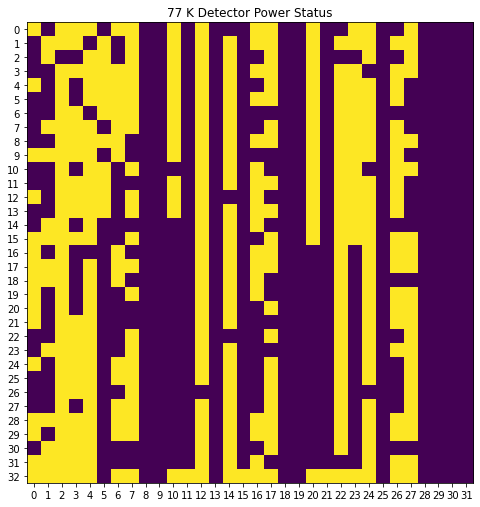

In [ ]:
#determine which detectors were on or off
#build dictionary of dictionaries that tell us which detectors were on or off
coord_dict3 = {}
for j in range(tes3.shape[0]):
    coord_dict3[j] = {coords.muxcr_to_msbd(j, i, p=0):np.count_nonzero(tes3[j, i, :])!=0 for i in range(tes3.shape[1])}
#collect these into a numpy array 
on_off3 = np.array([[int(x == True) for x in np.array(list(coord_dict3[k].values()))] for k in coord_dict3])
#plot graph
fig, ax = plt.subplots(figsize=(8, 10))
im = ax.imshow(on_off)
ax.set_xticks(np.arange(tes3.shape[1]))
ax.set_yticks(np.arange(tes3.shape[0]))
plt.title("77 K Detector Power Status")
plt.show()

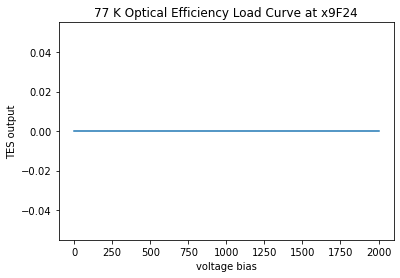

In [ ]:
#recreate plot
mux_c, mux_r = coords.xf_to_muxcr(anomXF[0], anomXF[1])
tesAtX9F24 = tes3[mux_c, mux_r, :]
plt.plot(bias, tesAtX9F24)
plt.xlabel("voltage bias")
plt.ylabel("TES output")
plt.title("77 K Optical Efficiency Load Curve at x9F24")
plt.show()

In [ ]:
#list of MSBD coordinates (assuming indices from file are multiplexing rows and columns)
coords_list3 = [coords.muxcr_to_msbd(anomaly_index, i, p=0) for i in range(tes3.shape[1])]
#frequency and spatial index from MSBD 
xf_list3 = [coords.msbd_to_xf(c[0], c[1], c[2], c[3]) for c in coords_list]
#coordinates of frequency index anomaly
anomXF = (9, 24)
anomXF in xf_list3

False

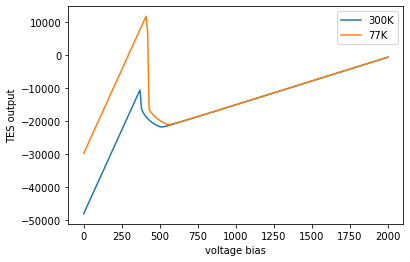

0


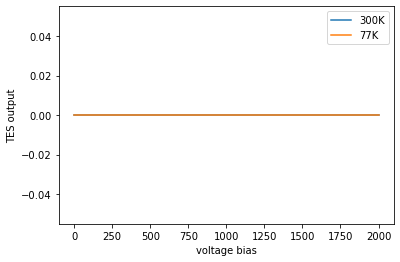

1


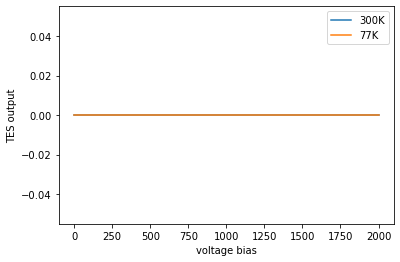

2


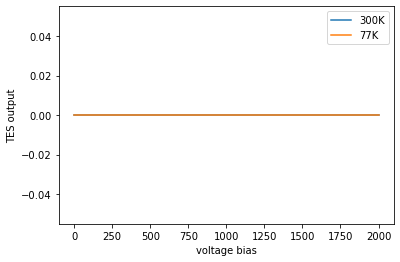

3


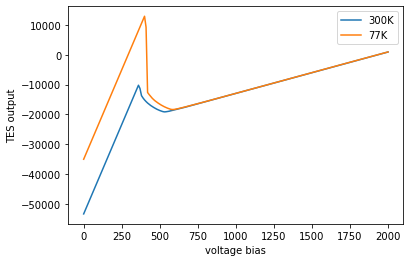

4


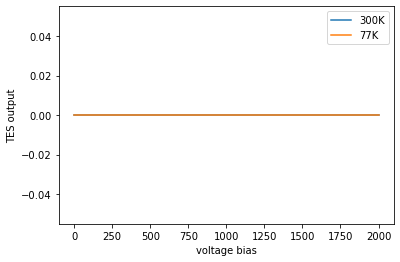

5


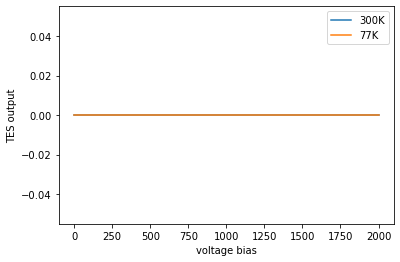

6


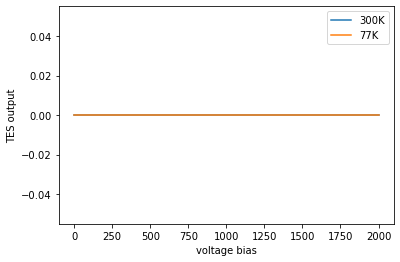

7


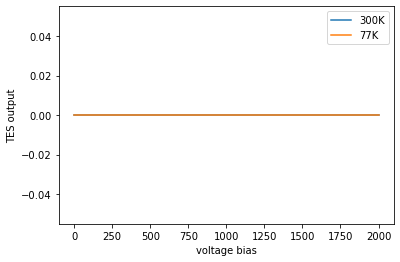

8


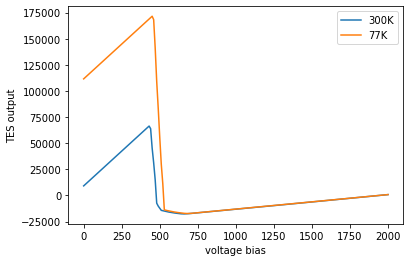

9


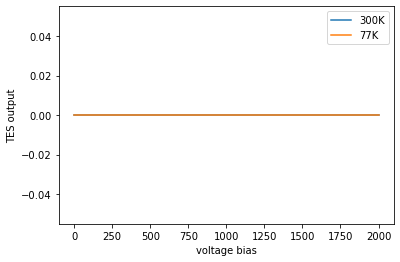

10


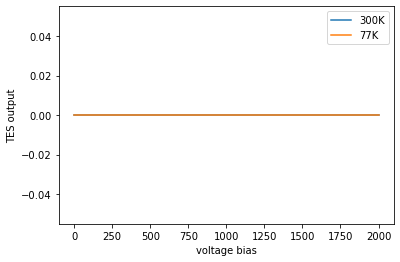

11


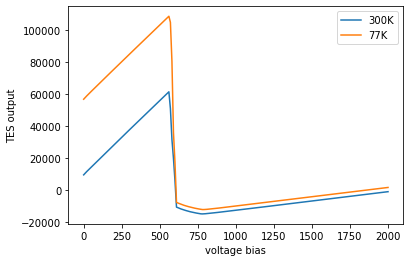

12


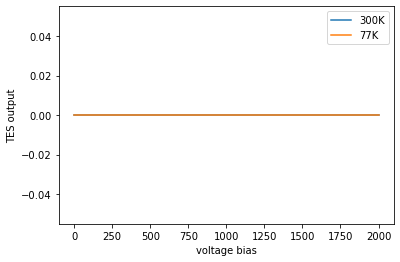

13


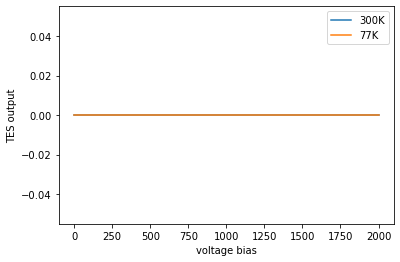

14


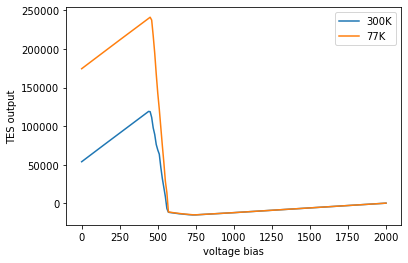

15


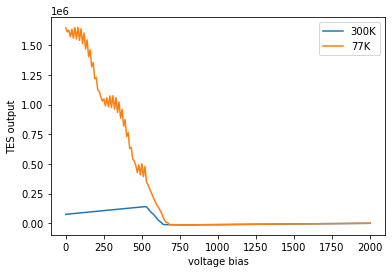

16


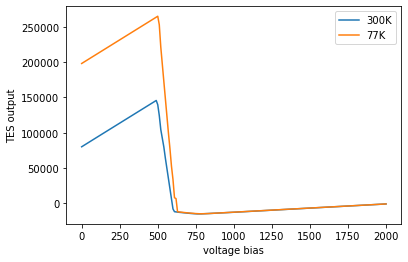

17


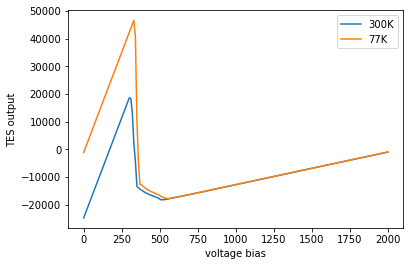

18


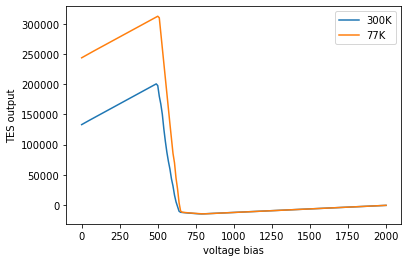

19


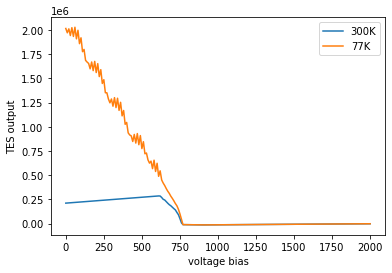

20


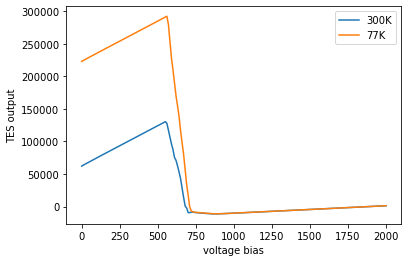

21


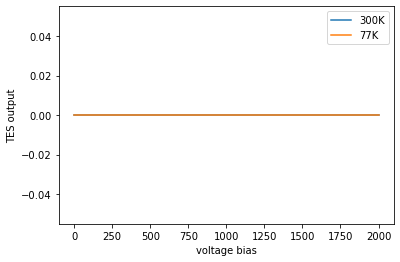

22


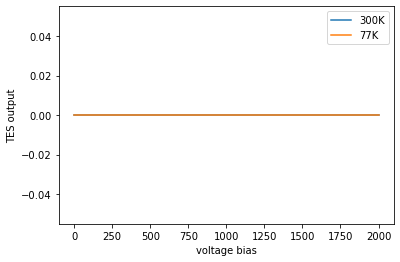

23


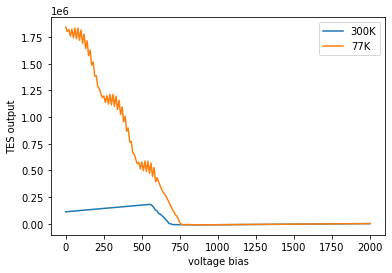

24


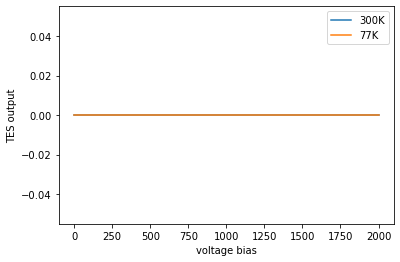

25


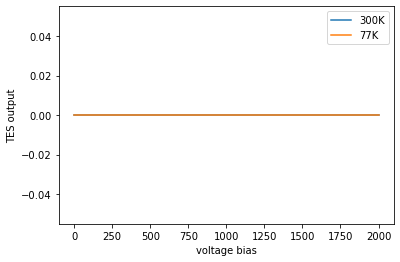

26


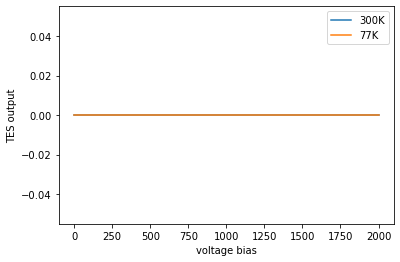

27


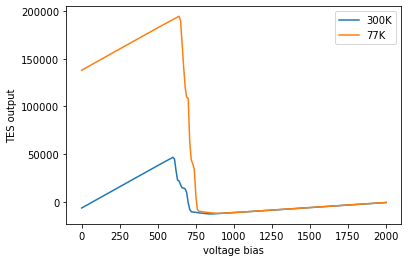

28


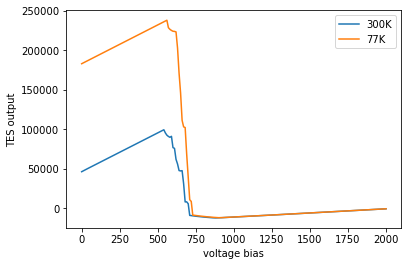

29


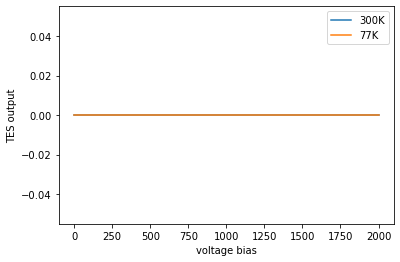

30


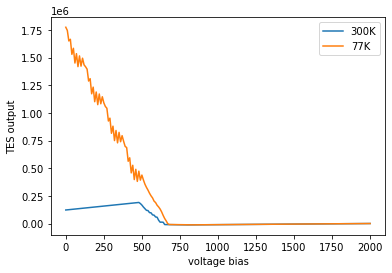

31


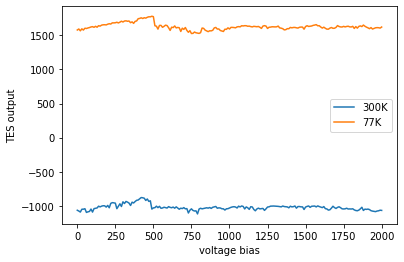

32


In [ ]:
opteff = []
#search for anomalies in the data
for i in range(tes3.shape[0]):
    plt.plot(bias, tes[i, 0, :], label="300K")
    plt.plot(bias3, tes3[i, 0, :], label="77K")
    plt.xlabel("voltage bias")
    plt.ylabel("TES output")
    plt.legend()
    plt.show()
    print(i)
    if np.count_nonzero(tes3[i, 0, :])!=0:
        opteff.append(abs(np.mean(tes[i, 0, :]/tes3[i, 0, :])))

In [ ]:
opteff

[1.185155520194113,
 1.3130853112646617,
 0.7941256081511472,
 1.9502860652402785,
 0.8309299382186794,
 0.6902607620971308,
 0.8146595406033666,
 0.43519110745096207,
 0.8471630822210442,
 0.7362907961690905,
 0.8449011798828902,
 0.6838781068269765,
 0.6639360896177562,
 0.7550189662611937,
 0.796987730421275,
 0.6293351153633571]

In [ ]:
for i in range(tes.shape[0]):
    for j in range(tes.shape[1]):
        if np.count_nonzero(tes3[i, j, :])!=0:
            print(abs(np.mean(tes[i, j, :]/tes3[i, j, :])))

1.185155520194113
0.6036730844534145
1.0007718936818495
0.7562862210704275
1.265206729493793
0.5673439129353756
1.314992067637766
1.067622780519068
1.4274763158765797
0.5470338387422267
0.6224700858501838
0.5770217764846792
1.0239086214551922
0.996723349088786
0.6253913050089627
0.03360211555266936
0.8486111261945055
0.9851045234634905
1.2928405587119747
0.34116355052841457
1.0809701431108825
0.9940526011593327
1.097749965161316
1.0033730621966543
0.6996697536884394
0.15106243764590968
1.0151528548245046
1.0854736448147733
0.9981531935794081
1.000277685144295
0.6512344224679659
0.7435939247189051
1.0002305130572668
0.3188336521870073
0.2764845226316882
0.9729265100989417
6.289812887273989
1.0107193143866506
0.8462450431590139
17.009619738727917
1.000445846115071
0.6946588998988604
0.8439971800476672
0.7513172052209097
0.9957880221692889
1.1600093904181652
3.192853801858281
0.6047717143225765
1.0193108969782438
0.6772019331005315
1.0375240036786653
10.863821792460705
0.6941713566177607


In [ ]:
#shape of data array - will need to modify for the other file
a,b,c = my_file.Read(row_col=True, unfilter='DC', unwrap=True).data.shape
#empty coordinate list
cordsList = []
#convert from column row to XF
for i in range(a):
    for j in range(b):
        C = coords.muxcr_to_msbd(i, j, p=0)
        try:
            cordsList.append(list(coords.msbd_to_xf(C[0], C[1], C[2], C[3])))
        except:
            continue
#position indices
pos = [cord[0] for cord in cordsList]
#freqency indices
freq = [cord[1] for cord in cordsList]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])